<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#DAU,-WAU,-MAU" data-toc-modified-id="DAU,-WAU,-MAU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DAU, WAU, MAU</a></span><ul class="toc-item"><li><span><a href="#Sticky-factor" data-toc-modified-id="Sticky-factor-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Sticky factor</a></span></li></ul></li><li><span><a href="#Количество-сессий-в-день" data-toc-modified-id="Количество-сессий-в-день-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество сессий в день</a></span></li><li><span><a href="#Продолжительность-типичной-пользовательской-сессии" data-toc-modified-id="Продолжительность-типичной-пользовательской-сессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Продолжительность типичной пользовательской сессии</a></span></li><li><span><a href="#Retentsion-Rate" data-toc-modified-id="Retentsion-Rate-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Retentsion Rate</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Первая-продажа" data-toc-modified-id="Первая-продажа-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Первая продажа</a></span></li><li><span><a href="#Количество-покупок-за-период" data-toc-modified-id="Количество-покупок-за-период-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество покупок за период</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#LTV" data-toc-modified-id="LTV-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LTV</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общая сумма расходов на маркетинг</a></span></li><li><span><a href="#CAC" data-toc-modified-id="CAC-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CAC</a></span></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ROMI</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ бизнес-показателей сайта Яндекс.Афиша

Цели проекта: 
 - изучение всех источников трафика и выбор самых перспективных
 - подсчет и изучение метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции
 - проведение когортного анализа и определение самых перспективных для компании когорт клиентов
 
Изучаемые данные: логи сайта Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши
- выгрузка всех заказов за этот период
- статистика рекламных расходов

## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
import matplotlib.dates as md
from matplotlib.ticker import FuncFormatter
from matplotlib import cycler
import operator
colors = cycler('color',
                ['#EAC435', '#345995', '#8C2D7E',
                 '#E40066', '#03CEA4', '#FB4D3D',
                 '#806045', '#04724D', '#FFFFFF',
                 '#00A8E8', '#88BB44', '#FFBBBB','#00FF00','#000000'])
plt.rc('axes',facecolor='#E6E6E6',  edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 0.999)})

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_log.csv')
except:
    visits = pd.read_csv('visits_log.csv')
try:    
    orders = pd.read_csv('/datasets/orders_log.csv')
except:
    orders = pd.read_csv('orders_log.csv')
try:    
    costs = pd.read_csv('/datasets/costs.csv')
except:
    costs = pd.read_csv('costs.csv')

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Структура visits_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Device — категория устройства пользователя,
 - Start Ts — дата и время начала сессии,
 - End Ts — дата и время окончания сессии,
 - Source Id — идентификатор источника перехода на сайт.

Посмотрим какие значения принимает столбец device и как они распределены.

In [5]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Пользователи заходят с двух типов устройств - с телефона и с ПК. Десктоп сессий больше примерно в 2.5 раза.

In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Структура orders_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Buy Ts — дата и время заказа,
 - Revenue — сумма заказа.

In [8]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Структура costs.csv
 - source_id — идентификатор рекламного источника,
 - dt — дата проведения рекламной кампании,
 - costs — расходы на эту кампанию.


Проверим, совпадают ли все временные промежутки в таблицах

In [10]:
print('visits max date:',visits['Start Ts'].max(),'|', 'visits min date:',visits['Start Ts'].min())
print()
print('costs max date',costs['dt'].max(),'|','costs min date',costs['dt'].min())
print()
print('orders max date',orders['Buy Ts'].max(),'|','orders min date',orders['Buy Ts'].min())

visits max date: 2018-05-31 23:59:00 | visits min date: 2017-06-01 00:01:00

costs max date 2018-05-31 | costs min date 2017-06-01

orders max date 2018-06-01 00:02:00 | orders min date 2017-06-01 00:10:00


В таблице orders есть строки с более поздними датами, чем в других таблицах - удалим их.

In [11]:
orders = orders[orders['Buy Ts'] < '2018-06-01 00:00:00']

Проверим наличие дупликатов строк в таблицах

In [12]:
print('Повторы строк visits:',visits.duplicated().sum())
print('Повторы строк orders:',orders.duplicated().sum())
print('Повторы строк costs:',costs.duplicated().sum())

Повторы строк visits: 0
Повторы строк orders: 0
Повторы строк costs: 0


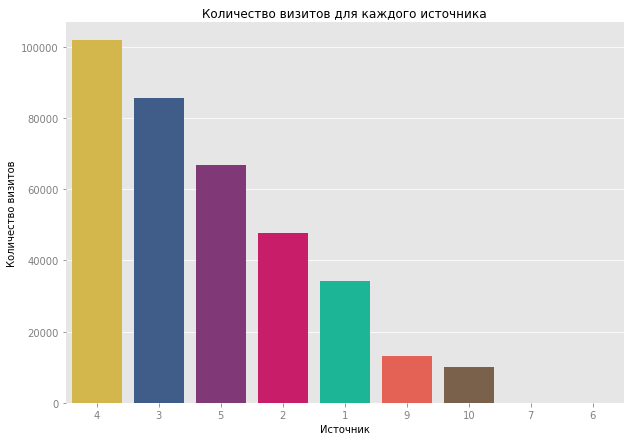

In [13]:
source_counts = visits['Source Id'].value_counts().to_frame().reset_index()

fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data =source_counts,
            x = 'index',
            y = 'Source Id', order = source_counts['index'])
plt.ylim(0,)
plt.title('Количество визитов для каждого источника')
plt.xlabel('Источник')
plt.ylabel('Количество визитов')
plt.show()

Самое большое количество посещений у 4 источника, а у 7 и 6 посещений практически нету.

### Вывод

Первый взгляд на данные:
 - Данные представлены в виде таблиц с данными о посещениях, заказах и расходах на рекламные компании в периоде с  июня 2017 по конец мая 2018 года
 - Пропусков в данных не обнаружено
 - Следует исправить разный регистр и пробелы в названиях столбцов
 - Даты во всех таблицах представлены типом object, следует поменять на datetime
 - Cтолбец device таблицы visits представлен двумя категориями - можно поменять тип на category

В остальном с данными все в порядке, после предоработки можно приступать к исследовательскому анализу.

## Предобработка данных

Исправим регистр названий столбцов.

In [14]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Заменим пробелы на прочерк.

In [15]:
visits.columns = visits.columns.str.replace(" ", "_")
orders.columns = orders.columns.str.replace(" ", "_")
costs.columns = costs.columns.str.replace(" ", "_")

Заменим тип дат на datetime тип столбца device на category

In [16]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['device'] = visits['device'].astype('category')

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

### Вывод

Названия столбцов исправлены, типы данных приведены к корректным - можно приступать к анализу.

## Продуктовые метрики

 ### DAU, WAU, MAU

Изучим количество уникальных пользователей в день, в неделю и в месяц.

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [17]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Посчитаем среднее количество уникальных пользователей в день, неделю и месяц за весь изучаемый период.

In [18]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

wau_total = (visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean())

mau_total = (visits.groupby('session_month').agg({'uid': 'nunique'}).mean())

print('Среднее количество уникальных пользователей в день:', int(dau_total))
print('Среднее количество уникальных пользователей в  неделю:',int(wau_total))
print('Среднее количество уникальных пользователей в  месяц:', int(mau_total))

Среднее количество уникальных пользователей в день: 907
Среднее количество уникальных пользователей в  неделю: 5716
Среднее количество уникальных пользователей в  месяц: 23228


Построим график количества новых пользователей в день в течении рассматриваемого периода.

In [19]:
dau_data = visits.groupby('session_date').agg({'uid': 'nunique'})

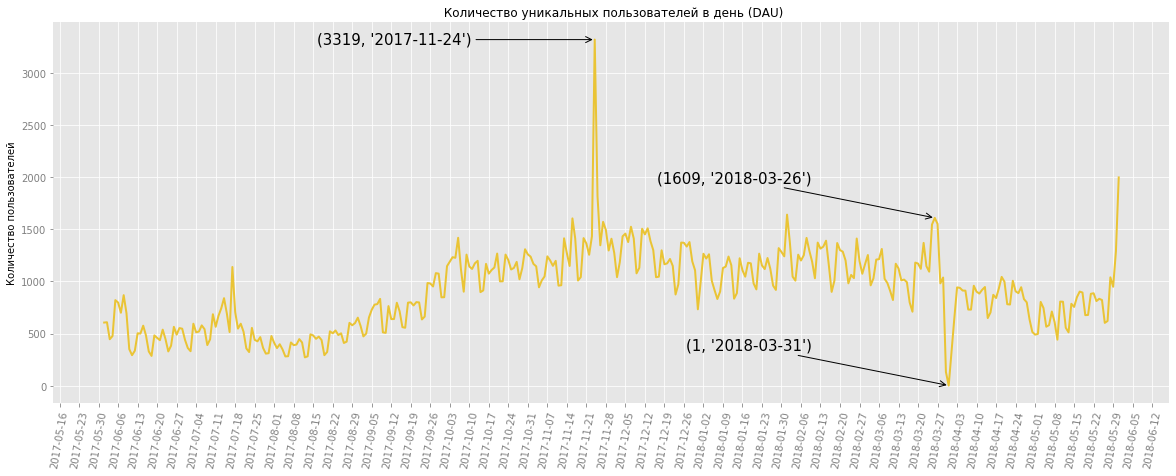

In [20]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(ax = ax, data = dau_data).set_title(' Количество уникальных пользователей в день (DAU)')
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 80)
plt.xlabel('')
plt.ylabel('Количество пользователей')

ax.annotate((dau_data.max()[0], str(dau_data.idxmax()[0])),
            xy=(dau_data.idxmax()[0], dau_data.max()[0]),
            xycoords='data',
            xytext=(-200, 0),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center',
            fontsize=15)

dau_data_filtered = dau_data[pd.to_datetime("2018-03-20").date() : pd.to_datetime("2018-04-03").date()]

ax.annotate(
            (dau_data_filtered.max()[0], str(dau_data_filtered.idxmax()[0])),
            xy=(dau_data_filtered.idxmax()[0], dau_data_filtered.max()[0]),
            xycoords='data',
            xytext=(-200, 40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center',
            fontsize=15)

ax.annotate(
            (dau_data_filtered.min()[0], str(dau_data_filtered.idxmin()[0])),  
            xy=(dau_data_filtered.idxmin()[0], dau_data_filtered.min()[0]),
            xycoords='data',
            xytext=(-200, 40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center',
            fontsize=15)
ax.get_legend().remove()
plt.show()

На графике можно наблюдать пик со значениями в 3319 уникальных пользователей в день.  
В этот день, 24 ноября 2017 года, на страницах Яндекс.Афиши в социальных сетях была анонсирована акция "Черная Пятница" со скидками 70% на билеты. Уже можно предположить, что данный канал привлечения клиентов может дать в три раза больший прирост новых пользователей по сравнению со средними значенями.

Падение 31 марта 2018 года, судя по сообщениям пользователей в социальных сетях, было вызвано неработающим сайтом, а предшествующий падению пик 26 марта - очередной акцией.

Смотря на график, можно выделить три периода:
 - С июля по октябрь 2017 года с меньшей активностью пользователей.
 - С октября 2017 по март 2018 года активность новых пользователей возросла, с наблюдаемыми пиками до 3000 тысяч новых пользователей в день.
 - С марта по июль 2018 года активность пользователей упала - возможно это как-то связано с техничским сбоем или уменьшенной активностью по привлечению новых клиентов.

Посчитаем среднее DAU для кажого из этих периодов, не включая день технического сбоя.

In [21]:
print('Среднее количество новых клиентов в день, период C июля по октябрь 2017 года: {:.0f} человек'.format(
      dau_data[pd.to_datetime("2017-06-01").date() : pd.to_datetime("2017-10-01").date()].mean()[0]))
print()
print('Среднее количество новых клиентов в день, период с октября 2017 по март 2018: {:.0f} человек'.format(
      dau_data[pd.to_datetime("2017-10-01").date() : pd.to_datetime("2018-03-29").date()].mean()[0]))
print()
print('Среднее количество новых клиентов в день, период с марта по июль 2018 года: {:.0f} человек'.format(
      dau_data[pd.to_datetime("2018-04-01").date() : pd.to_datetime("2018-05-31").date()].mean()[0]))

Среднее количество новых клиентов в день, период C июля по октябрь 2017 года: 555 человек

Среднее количество новых клиентов в день, период с октября 2017 по март 2018: 1189 человек

Среднее количество новых клиентов в день, период с марта по июль 2018 года: 815 человек


С марта до конца рассматриваемого периода активность новых пользователей уменьшилась довольно сильно.

Рассмотрим график количества новых пользователей в неделю.

In [22]:
wau_data = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
wau_data['week_date'] = pd.to_datetime(wau_data['session_year'].astype(str) + ' ' + wau_data['session_week'].astype(str) + ' 1',
                                format='%Y %U %w')

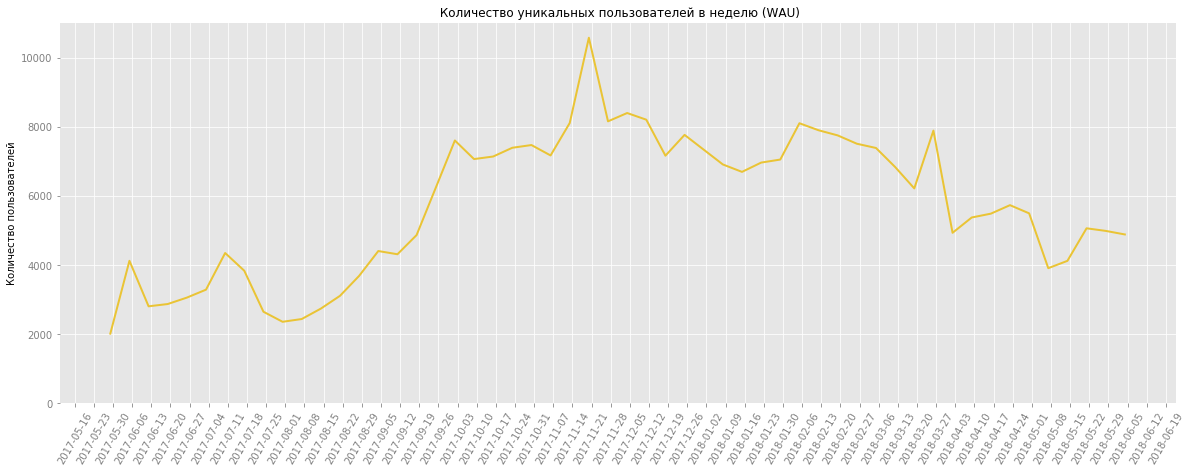

In [23]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(data = wau_data, y = 'uid', x = 'week_date')\
.set_title(' Количество уникальных пользователей в неделю (WAU)')
plt.ylim(0,)
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 60)
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.show()

Количество новых пользователей в неделю больше всего в периоде с сентября 2017 года до марта 2018 года, с пиком во время проведения акции "Черная Пятница".   
Начиная с марта показатели уже не такие высокие - возможно это следствие технических неполадок на сайте.


Рассмотрим график количества новых пользователей в месяц.

In [24]:
mau_data = visits.groupby('session_month').agg({'uid': 'nunique'}).reset_index()

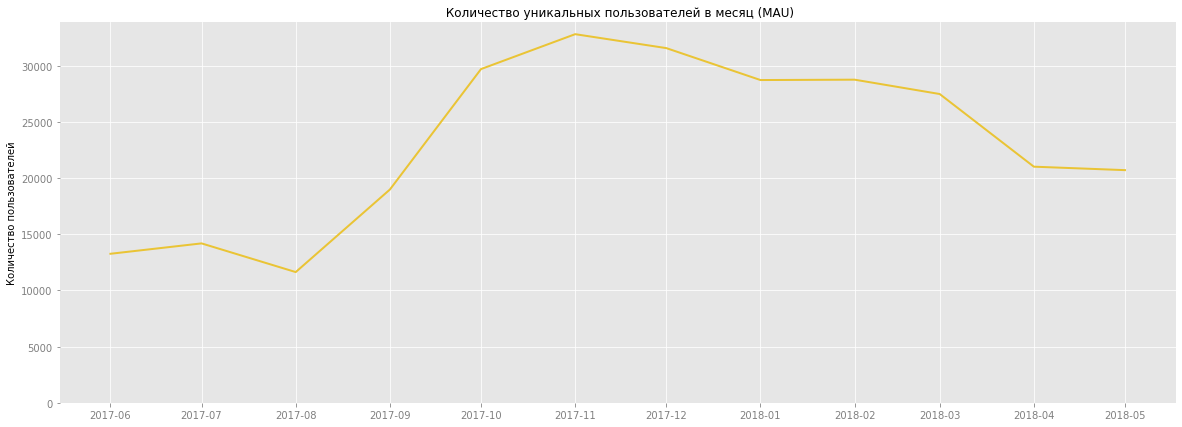

In [25]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(data = mau_data, y = 'uid', x = 'session_month')\
.set_title(' Количество уникальных пользователей в месяц (MAU)')
ax.xaxis.set_major_locator(md.MonthLocator(bymonth=None, bymonthday=1, interval=1, tz=None))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0) 

plt.ylim(0,)
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.show()

График месячной активности по динамике повторяет график DAU и WAU.

#### Sticky factor

Расчиттаем недельный и месячный коэффициент вовлеченности пользователей (Sticky Factor)

In [99]:
sticky_mau = dau_total / mau_total * 100
sticky_wau = dau_total / wau_total * 100
print('Sticky WAU:', sticky_wau.round(2)[0],'%')
print('Sticky MAU:', sticky_mau.round(2)[0],'%')

Sticky WAU: 15.88 %
Sticky MAU: 3.91 %


Довольно маленький месячный коэффициент вовлеченности говорит о том, что большая часть пользователей новые, а не повторно использующие приложение. Возможно это связано со спецификой агрегатора по продаже билетов. 

### Количество сессий в день

Посчитаем среднее количество сессий, совершаемых пользователем за один день, и отобразим изменение этой величины на графике.

In [27]:
sess_per_day = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sess_per_day.columns = ['n_sessions','n_users']
sess_per_day.reset_index(inplace = True)
sess_per_day['sess_per_user'] = sess_per_day['n_sessions'] / sess_per_day['n_users']
print('В среднем один пользователь совершает {:.3f} сессий в день'.format(sess_per_day['sess_per_user'].mean()))

В среднем один пользователь совершает 1.082 сессий в день


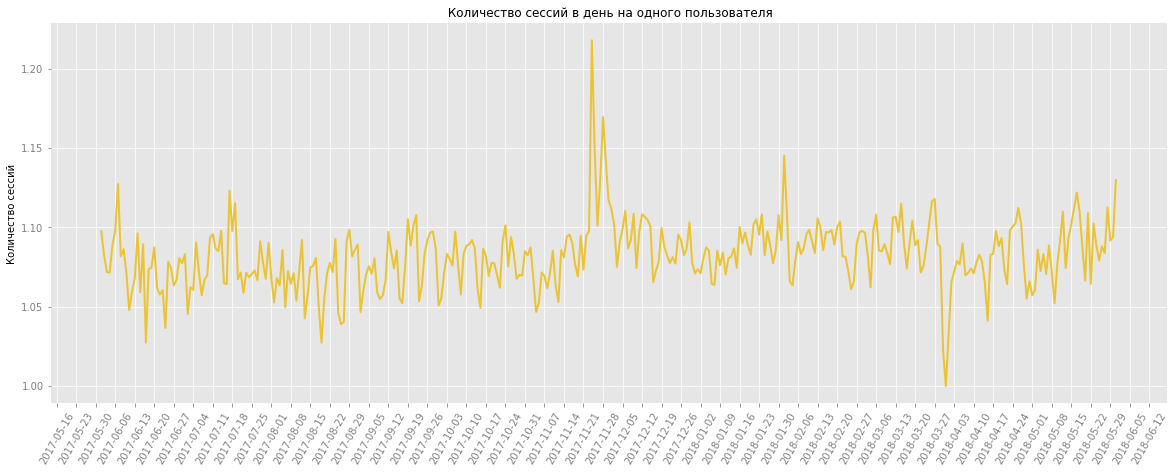

In [28]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(ax = ax, data = sess_per_day,y = 'sess_per_user', x = 'session_date').set_title(' Количество сессий в день на одного пользователя')
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 60)

plt.xlabel('')
plt.ylabel('Количество сессий')
plt.show()

Судя по графику, в течении всего рассматриваемого периода пользователи редко заходят на сайт чаще одного раза. Так же, как и в случае пользовательской активности, наблюдается пик во время прохождения акций с большими скидками. 

###  Продолжительность типичной пользовательской сессии

Посчитаем продолжительность пользовательской сессии и изучим распределение.

In [29]:
visits['session_dur'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

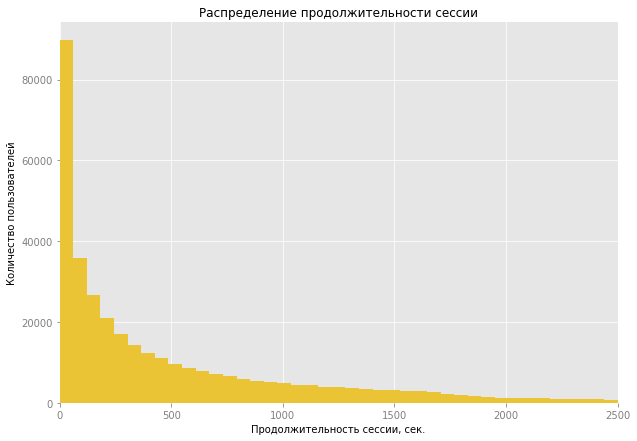

In [30]:
fig, ax = plt.subplots()
visits['session_dur'].plot(kind = 'hist',ax = ax, bins = 41, range = (0,2500))
plt.xlim(0,2500)
plt.title('Распределение продолжительности сессии')
plt.xlabel('Продолжительность сессии, сек.')
plt.ylabel('Количество пользователей')
plt.show()

Распределние не похоже на нормальное - для оценки среднего будем использовать моду.


In [31]:
print('В среднем одна пользовательская сессия длится {} секунд'.format(
    visits['session_dur'].mode()[0])
     )

В среднем одна пользовательская сессия длится 60 секунд


### Retentsion Rate

Расичтаем коэффициент удержания в разрезе когорт. Когорты сформируем по времени первого визита пользователя.

Добавим к таблице с визитами дату первого посещения.

In [32]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'

In [33]:
visits = visits.join(first_visit_date, on = 'uid')

In [34]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

Добавим столбец lifetime - время жизни когорты.

In [35]:
visits['lifetime'] = visits['session_month'] - visits['first_visit_month']
visits['lifetime'] = (visits['lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определенный месяц жизни.

In [36]:
cohorts = visits.groupby(['first_visit_month','lifetime']).agg({'uid':'nunique'}).reset_index()

Посчитаем начальное количество пользователей каждой когорты, добавим к сгруппированным данным и расчитаем Retension Rate.

In [37]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [38]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = (cohorts['uid']/cohorts['cohort_users']) 
cohorts['first_visit_month'] =  cohorts['first_visit_month'].dt.strftime('%Y-%m')

Выведем тепловую карту Retension Rate.

In [39]:
retention_pivot = cohorts.query('lifetime > 0').pivot_table(
    index='first_visit_month',
    columns='lifetime',
    values='retention'
) 

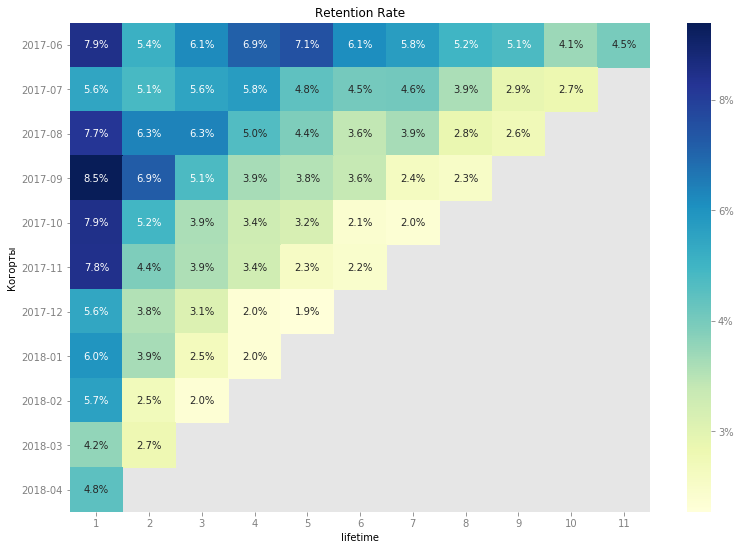

In [40]:
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=0.0, cmap='YlGnBu',cbar_kws={'format': FuncFormatter(fmt)})
plt.ylabel('Когорты')

plt.yticks(rotation=0)
plt.show()

In [41]:
print('Средний Retention Rate на второй месяц жизни» когорт: {:.1%}'.format(
   cohorts.query('lifetime == 1')['retention'].mean())
     )

Средний Retention Rate на второй месяц жизни» когорт: 6.5%


Коэффициент удержания от когорт 2017 года к когортам 2018 года падает - как на второй месяц, так и в течении дальнейшей жизни когорт. Если показатели когорты июля 2017 года упали до значений 2.7% удержания только к 11 месяцу жизни, то у когорты марта 2018 такие показатели уже к третьему месяцу жизни.

Самые лучшие результаты показывает когорта июля 2017 года.

### Выводы

При изучении пользовательской активности, пользовательских сессий и коэффициента удержания были сделаны следующие выводы:

Было обнаружены три периода, в течении которых активность уникальных пользователей довольно сильно менялась:
   - Период с июля по октябрь 2017 года с меньшей активностью пользователей, в среднем 555 человек в день.
   - С октября 2017 по март 2018 года, когда активность уникальных пользователей возросла, с наблюдаемыми пиками до 3000 тысяч пользователей в день. 
   - С марта по июль 2018 года, когда активность пользователей упала - возможно это как-то связано с техничским сбоем, обнаруженным 31 марта, или уменьшенной активностью по привлечению новых клиентов.
   
Самое большое количество уникальных пользователей было зафиксировано во время проведения акции "Черная пятница". Агрессивный маркетинг со скидками до 70% оказался довольно эффективным.

При изучении пользовательских сессий было обнаружено, что пользаватели Яндекс.Афиши редко заходят на сайт чаще одного раза в день. Средняя продолжитльность сессии - 60 секунд.

Так же был проведен когортный анализ коэффициента удержания на основании месяца первого визита пользователя:  
 - Средний Retension Rate на второй месяц жизни когорт составил  6.5%.  
 - Cо временем от когорт 2017 года к когортам 2018 средний кэффициент уменьшается, как на второй месяц, так и в течении дальнейшей жизни когорт. 
 -  Лучшие резульаты показывает самая ранняя изучаемая когорта июня 2016 года - даже спустя 12 месяцев жизни этой когорты  ее  Retension Rate составляет 4.5%





## Метрики электронной коммерции

### Первая продажа

Изучим, сколько времени проходит от момента первого визита пользователя до первой покупки.

Добавим к таблице с заказами дату первого посещения.

In [42]:
first_visit = visits[['uid','first_visit_date']]
first_visit.drop_duplicates('uid', inplace = True)

In [43]:
orders = orders.merge(first_visit, on= 'uid')

Добавим к таблице с заказами дату первой покупки.

In [44]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

In [45]:
orders = orders.join(first_order_date, on ='uid')

Посчитаем время от первого визита до первой покупки и изучим распределение этой величины

In [46]:
orders['time_before_order'] = orders['first_order_date'] - orders['first_visit_date']

In [47]:
time_before_order = orders[['uid','time_before_order']]
time_before_order.drop_duplicates(subset = 'uid', inplace = True)

In [48]:
time_before_order['time_before_order'].describe()

count                      36522
mean     16 days 21:40:50.532281
std      47 days 01:45:34.984683
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:30
max            363 days 07:04:00
Name: time_before_order, dtype: object

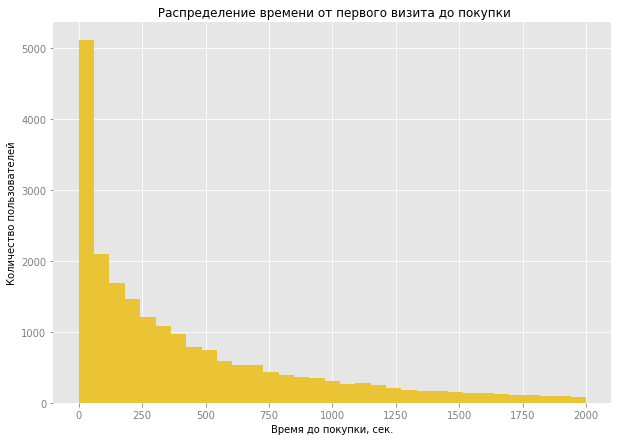

In [49]:
fig, ax = plt.subplots()
time_before_order['time_before_order'].astype('timedelta64[s]').plot(
    kind = 'hist',ax = ax, bins = 33, range = (0,2000))
#plt.xlim(0,100000)
plt.title(' Распределение времени от первого визита до покупки')
plt.xlabel('Время до покупки, сек.')
plt.ylabel('Количество пользователей')
plt.show()

В значениях присутвуют выбросы с показателями до 363 дней с момента первого визита до покупки, а распределение значения смещено - во избежание искажений для оценки среднего будем использовать моду.

In [50]:
print('Среднее время с момента первого визита до покупки:',
      int(str(time_before_order['time_before_order'].mode()).split(":")[1]),'минута')

Среднее время с момента первого визита до покупки: 1 минута


### Количество покупок за период

Посчитаем среднее количество покупок на одного пользователя за 6 месяцев в разрезе когорт. Для этого выделим только те когорты, возраст которых составляет не менее 6 месяцев.

Добавим в таблицу с заказами месяц первого визита, месяц заказа и время жизни когорты.

In [51]:
orders['first_visit_month'] = orders['first_visit_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [52]:
orders['lifetime'] = orders['order_month'] - orders['first_visit_month']
orders['lifetime'] = (orders['lifetime'] / np.timedelta64(1, 'M')).round().astype('int')

Сгруппируем заказы по месяцу первого заказа и времени жизни когорты, посчитаем количество заказов.

In [53]:
cohorts_orders = orders.groupby(['first_visit_month','lifetime']).agg({'uid':'count'}).reset_index()
cohorts_orders.columns=['first_visit_month','lifetime','orders']

Посчтаем количество человек в каждой когорте и добавим эти значения к группировке.

In [54]:
cohort_sizes = orders.groupby('first_visit_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_visit_month','total_buyers']

In [55]:
cohorts_orders = cohorts_orders.merge(cohort_sizes,on='first_visit_month') 

Определим какие когорты прожили минимум 6 месяцев.

In [56]:
cohorts_orders.query('lifetime >= 5')['first_visit_month'].unique()

array(['2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

Отфильтруем группировку и посчитаем общее количество заказов у подходящих когорт.

In [57]:
cohorts_ratio = cohorts_orders.query('lifetime < 6 and first_visit_month <= "2017-12-01"')\
.groupby('first_visit_month').agg({'orders':'sum','total_buyers':'max'})

Посчитаем среднее количество заказов.

In [58]:
print('В среднем, за 6 месяцев один покупатель совешает {:.2f} заказа'.format(
    cohorts_ratio['orders'].sum() / cohorts_ratio['total_buyers'].sum()))

В среднем, за 6 месяцев один покупатель совешает 1.32 заказа


### Средний чек

Посчитаем средний чек - сгруппруем заказы по месяцам и разделим выручку на количество заказов.

In [59]:
check_per_month = orders.groupby(['order_month']).agg({'uid': 'count','revenue':'sum'})
check_per_month['average_check'] = check_per_month['revenue'] / check_per_month['uid']
check_per_month.reset_index(inplace = True)
check_per_month = check_per_month.query('order_month != "2018-06-01"')
print('Средний чек равен {:.2f} у.е.'.format(
   check_per_month['revenue'].sum() / check_per_month['uid'].sum()))

Средний чек равен 5.00 у.е.


Отразим на графике как меняется средний чек в течении изучаемого периода.

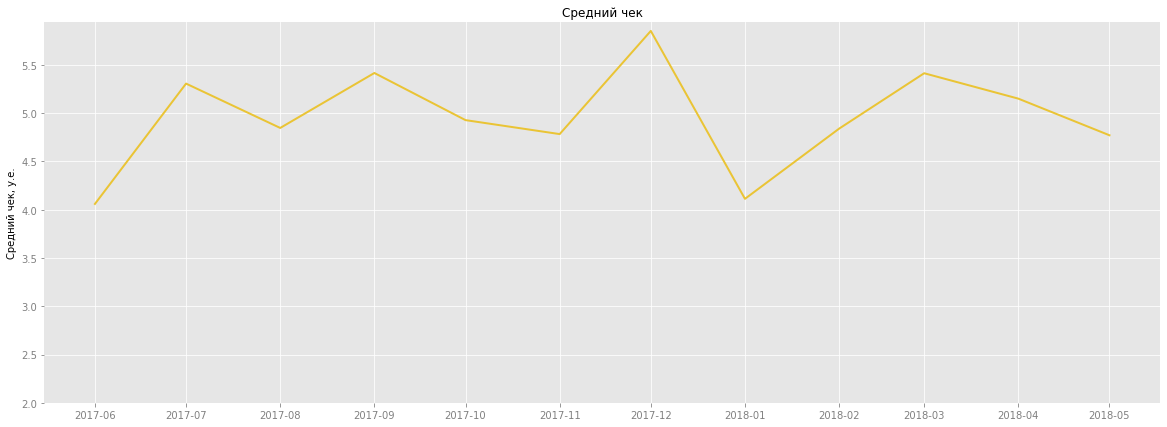

In [60]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(data = check_per_month, y = 'average_check', x = 'order_month')
ax.xaxis.set_major_locator(md.MonthLocator(bymonth=None, bymonthday=1, interval=1, tz=None))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0) 

plt.ylim(2,)
plt.title('Средний чек')
plt.xlabel('')
plt.ylabel('Средний чек, у.е.')
plt.show()

Средний чек сильно зависит от сезонности. Самый большой средний чек наблюдается накануне Нового Года, а самый малый - после нового года и в июле.

### LTV

Выясним, как меняется LTV на покупателя по когортам.

Сгруппируем заказы по месяцу первого визита и месяцу заказа, посчитаем сумму выручки и добавим к группировке общее количество покупателей каждой когорты.

In [61]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['cohort_age'] = orders['order_month'] - orders['first_order_month']
orders['cohort_age'] = (orders['cohort_age'] / np.timedelta64(1, 'M')).round().astype('int')

In [62]:
cohort_sizes_orders = orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes_orders.columns = ['first_order_month','total_buyers']

In [63]:
cohorts_revenue = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','cohort_age':'max'}).reset_index()
cohorts_revenue = cohorts_revenue.merge(cohort_sizes_orders ,on='first_order_month')

Расчитаем валовую прибыль и LTV 

In [64]:
margin_rate = 1

cohorts_revenue['gp'] = cohorts_revenue['revenue'] * margin_rate
cohorts_revenue['ltv'] = cohorts_revenue['gp'] / cohorts_revenue['total_buyers']
cohorts_revenue['first_order_month'] =  cohorts_revenue['first_order_month'].dt.strftime('%Y-%m')

Просуммируем LTV и выведем heatmap для тех когорт, которые успели прожить не менее 6 месяцев.

In [65]:
output = cohorts_revenue.pivot_table(
    index='first_order_month', columns='cohort_age', values='ltv', aggfunc='mean'
)
output = output.cumsum(axis=1).round(2)

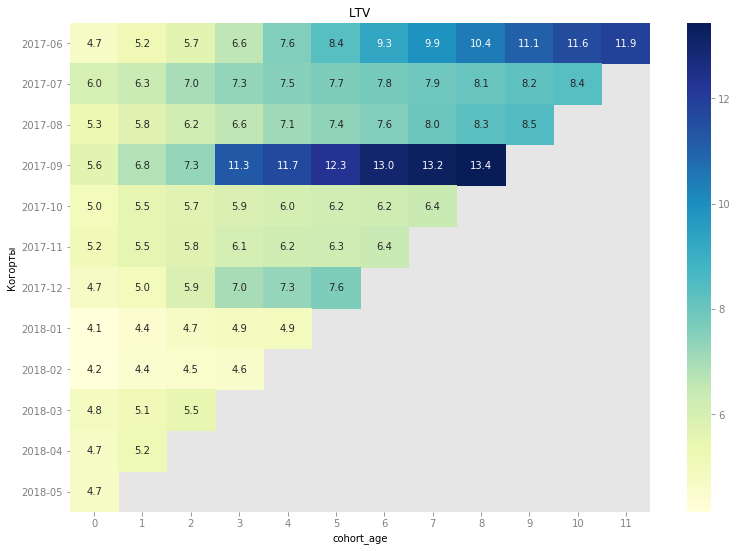

In [66]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(
    output, annot=True, fmt='.1f', linewidths=0.0, cmap='YlGnBu')
plt.ylabel('Когорты')

plt.yticks(rotation=0)
plt.show()

Выведем показатели LTV на шестой месяц жизни когорт и посчитаем среднее.

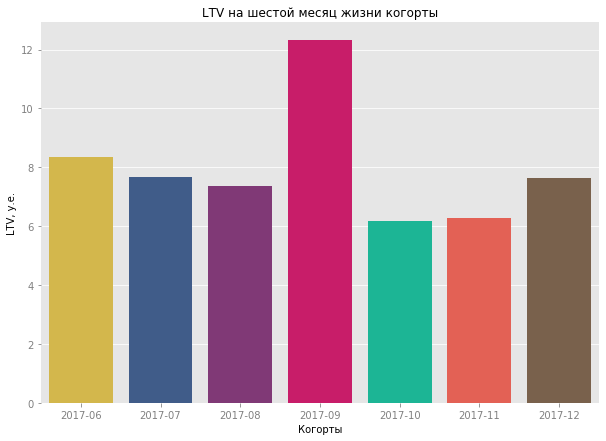

In [67]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = (output[5].to_frame().reset_index()),x = 'first_order_month', y = 5)
plt.ylim(0,)
plt.xlim(-0.5,6.5)
plt.title('LTV на шестой месяц жизни когорты')
plt.xlabel('Когорты')
plt.ylabel('LTV, у.е.')
plt.show()

In [68]:
print('В среднем, каждый покупатель за 6 месяцев приносит {:.2f} у.е. валовой прибыли'.format(output.mean(axis=0)[5]))

В среднем, каждый покупатель за 6 месяцев приносит 7.97 у.е. валовой прибыли


Больше всего валовой прибыли принесла когорта июня 2017 года.

### Выводы

В процессе изучения метрик электронной комерции были сделаны следующие выводы:
   - В среднем, с момента первого визита до продажи проходит 1 минута. Клиенты Яндекс.Афиши чаще всего заходят на сайт не выбирать, а сразу покупать.
   - В среднем, за 6 месяцев один покупатель совешает 1.32 заказа. Эта метрика говорит о том, что покупатели редко совершают больше двух покупок - стоит больше ориентироваться на новых клиентов.
   - Средний чек равен 5.00 у.е. Так же было обнаружено, что средний чек сильно зависит от сезонности. Самый большой средний чек наблюдается накануне Нового Года, а самый малый - после нового года и в июле.
   - Больше всего валовой прибыли за 6 месяцев принесли когорты пользователей, впервые посетившие ресурс в сентябре, июне и декабре 2017 года - возможно для этих групп пользователей были предложены особые условия.
   - В среднем, каждый покупатель за 6 месяцев приносит 7.10 у.е. валовой прибыли.

## Маркетинговые метрики

### Общая сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам.

Добавим в таблицу с тратами месяц.

In [69]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Создадим сводною таблицу с месячными расходами для кажого источника трафика и выведим график.

In [70]:
total_costs_pivot = costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc ='sum')

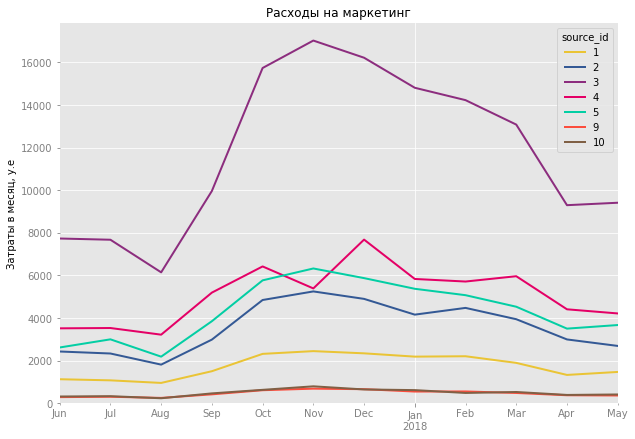

In [71]:
fig, ax = plt.subplots(figsize = (10, 7))
total_costs_pivot.plot(ax=ax)
plt.ylim(0,)
plt.title('Расходы на маркетинг')
plt.xlabel('')
plt.ylabel('Затраты в месяц, у.е')
plt.show()

Судя по графику, на источник под номером 3 уходит ощутимо больше средств, чем на остальные. В общем динамика расходов на маркетинг совпадает с показателями дневной, недельной и месячной активности пользователей - больше расходов, больше активность.

Выведем сумму расходов для каждого источника.

In [72]:
source_costs = total_costs_pivot.sum().to_frame()
source_costs.columns = ['total_costs']
source_costs

,total_costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Выведем сумму расходов по месяцам и сумму всех расходов на маркетинг.

In [73]:
total_costs_month = total_costs_pivot.cumsum(axis=1)[10].to_frame()
total_costs_month.columns = ['total_costs']
total_costs_month

,total_costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [74]:
print('Общие расходы на маркетинг за все время: {} у.е.'.format(total_costs_month.sum()[0]))

Общие расходы на маркетинг за все время: 329131.62 у.е.


### CAC

Рассчитаем среднюю стомость привлечения одного покупателя для всего проекта и для каждого источника трафика.

In [75]:
print('Средний расход на одного покупателя: {:.2f} у.е.'.format(costs['costs'].sum()  / orders['uid'].nunique()))

Средний расход на одного покупателя: 9.01 у.е.


Добавим к таблице с месячными расходами на маркетинг количество новых пользователей, посчитаем САС и выведем график изменения этой метрики.

In [76]:
total_costs_month.reset_index(inplace = True)
total_costs_month = total_costs_month.merge(cohort_sizes, left_on = 'month', right_on = 'first_visit_month') 
total_costs_month.drop(columns = 'first_visit_month', inplace = True)

In [77]:
total_costs_month['cac'] = total_costs_month['total_costs'] / total_costs_month['total_buyers']
total_costs_month['month'] =  total_costs_month['month'].dt.strftime('%Y-%m')

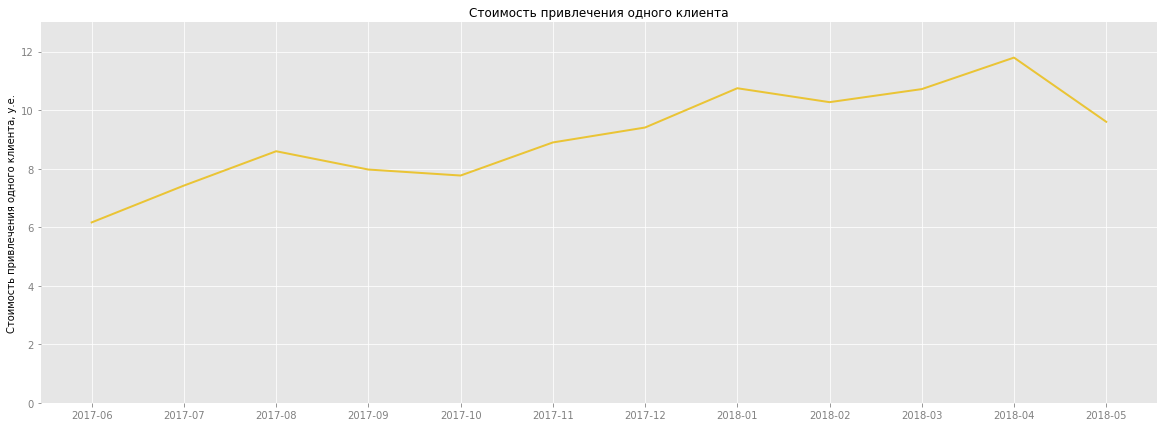

In [78]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(data = total_costs_month, y = 'cac', x = 'month')

plt.ylim(0,13)
plt.title('Стоимость привлечения одного клиента')
plt.xlabel('')
plt.ylabel('Стоимость привлечения одного клиента, у.е.')
plt.show()

На протяжении изучаемого периода стоимость привлечения одного клиента повышается в 2 раза.

Добавим к таблице в заказами номер источника, через который в первый раз пользователь зашел на ресурс.

In [79]:
users = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id':'first'}).reset_index()
users.columns = ['uid', 'first_source']

In [80]:
orders = orders.merge(users, on = 'uid')

Посчитаем для кажого источника среднюю САС и постром график.

Средняя стомость привлечения одного клиента из 1 источника:7.19 у.e.

Средняя стомость привлечения одного клиента из 2 источника:12.21 у.e.

Средняя стомость привлечения одного клиента из 3 источника:13.49 у.e.

Средняя стомость привлечения одного клиента из 4 источника:5.93 у.e.

Средняя стомость привлечения одного клиента из 5 источника:7.47 у.e.

Средняя стомость привлечения одного клиента из 9 источника:5.07 у.e.

Средняя стомость привлечения одного клиента из 10 источника:4.38 у.e.



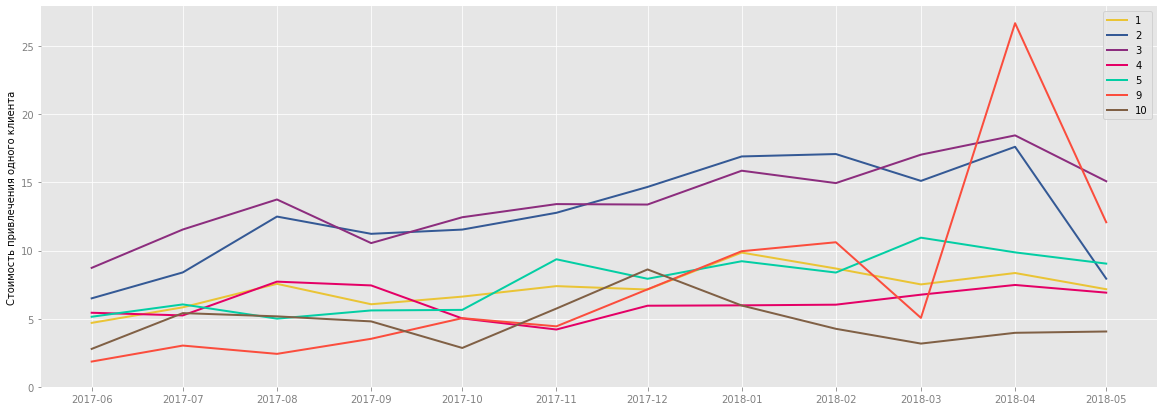

In [81]:
source_list = source_costs.index
source_cac = pd.DataFrame()

fig, ax = plt.subplots(figsize = (20, 7))

for i in source_list:
    
    table = orders.query('first_source == @i').groupby('first_visit_month').agg({'uid':'nunique'})
    table = table.join(costs.query('source_id == @i').groupby('month').agg({'costs':'sum'}))
    table['cac'] = table['costs'] / table['uid']
    table['source'] = i

    source_cac = pd.concat([table, source_cac])
    
    sns.lineplot(data = table['cac'], ax =ax, label = i)
    
    print('Средняя стомость привлечения одного клиента из',i,'источника:{:.2f} у.e.'.format(
            table['costs'].sum() / table['uid'].sum()
    ))
    print()


ax.xaxis.set_major_locator(md.MonthLocator(bymonth=None, bymonthday=1, interval=1, tz=None))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0) 
plt.ylim(0,)
plt.xlabel('')
plt.ylabel('Стоимость привлечения одного клиента')
plt.show()

Больше всех стоят клиенты из второго и третьего источника на протяжении всего периода. Большой пик стоимости девятого источника в апреле вряд ли повлиял на общую картину - доля источника по номером 9 в общих расходах на маркетинг небольшая.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
САС в разрезе источников найден корректно. Действительно, 3-й источник лидирует по САС.

### ROMI

Рассчитайтаем ROMI по когортам в разрезе источников и сравним окупаемость за 6 месяцев жизни когорт.

Построим тепловую карту LTV И ROMI для каждого источника и соберем в цикле данные о средних значениях для каждого источника. 

In [82]:
costs['month'] =  costs['month'].dt.strftime('%Y-%m')

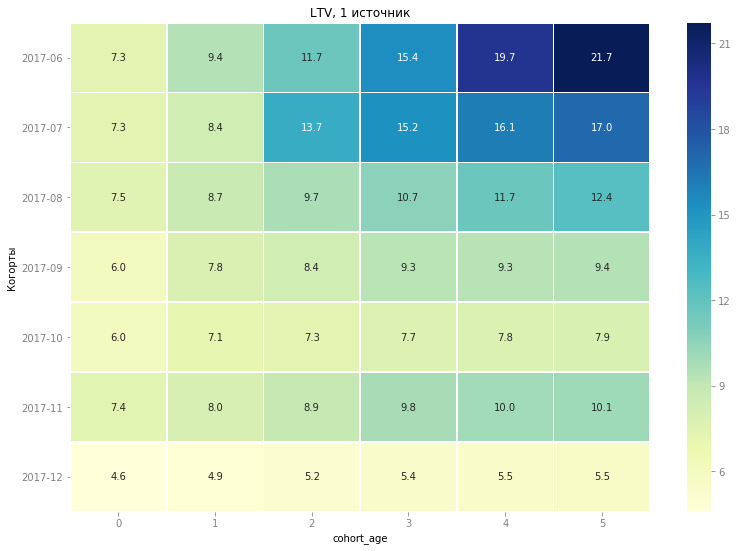

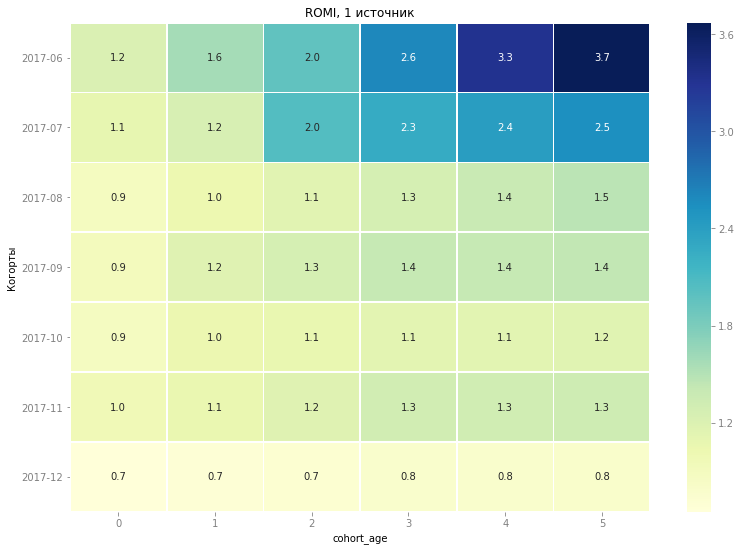

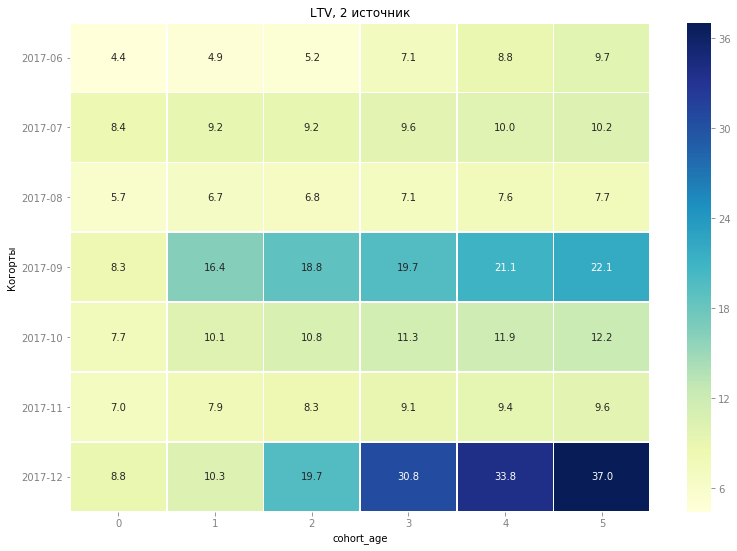

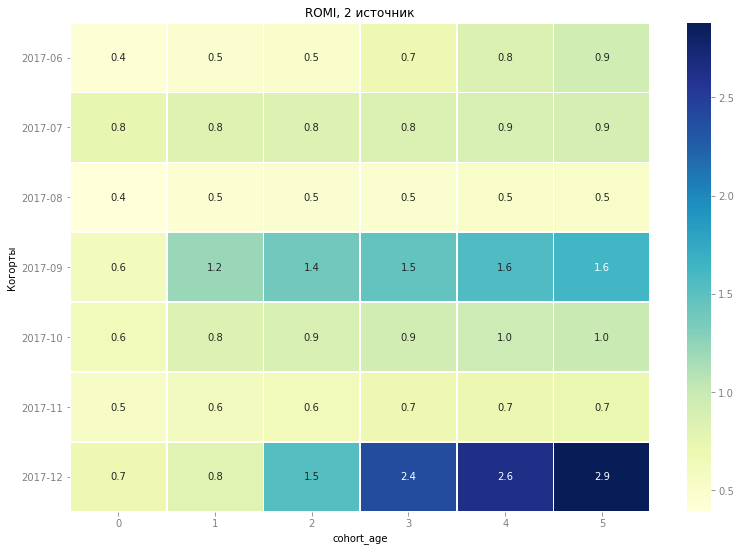

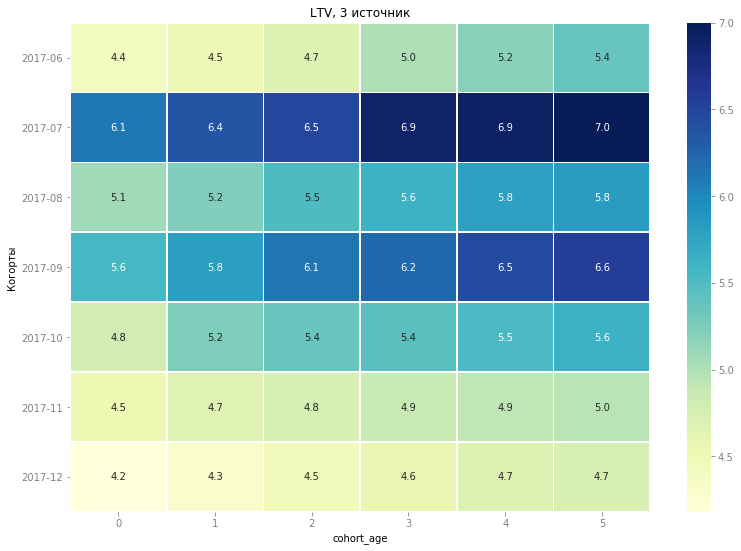

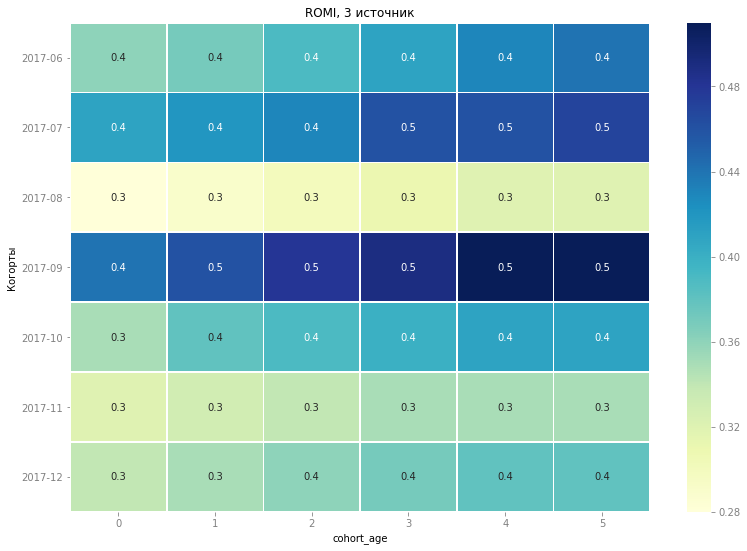

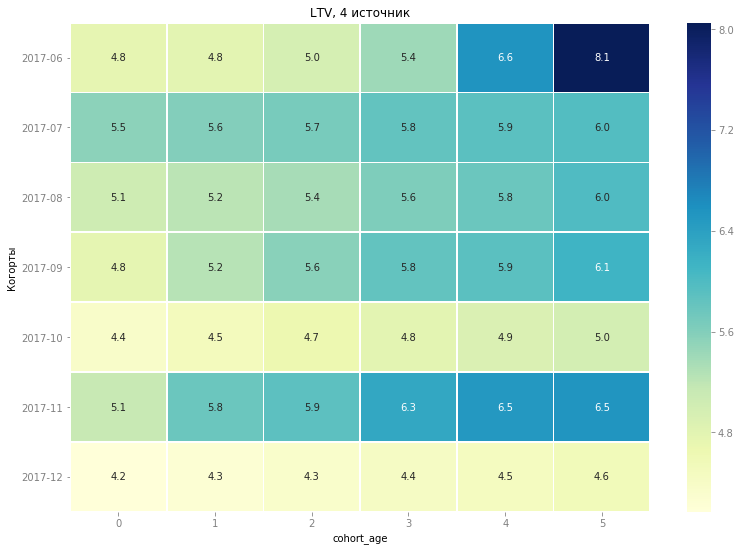

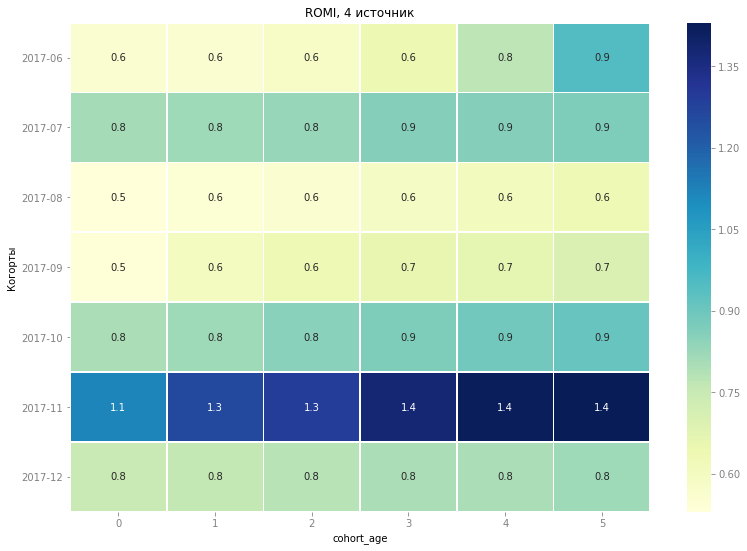

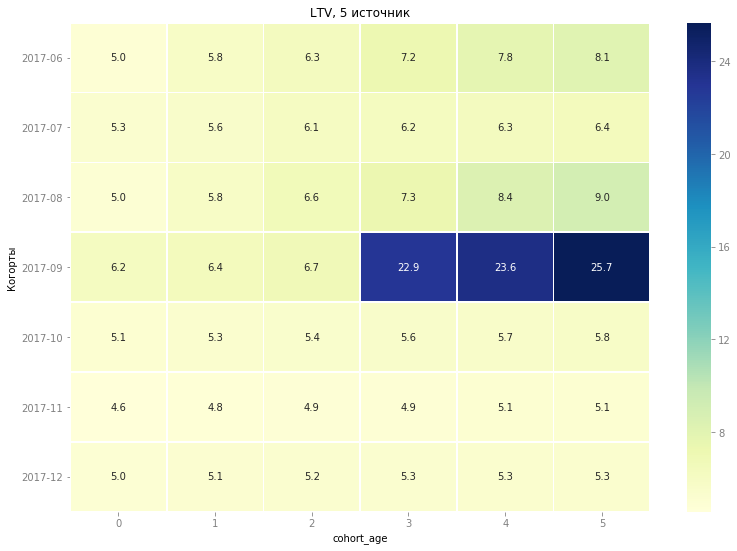

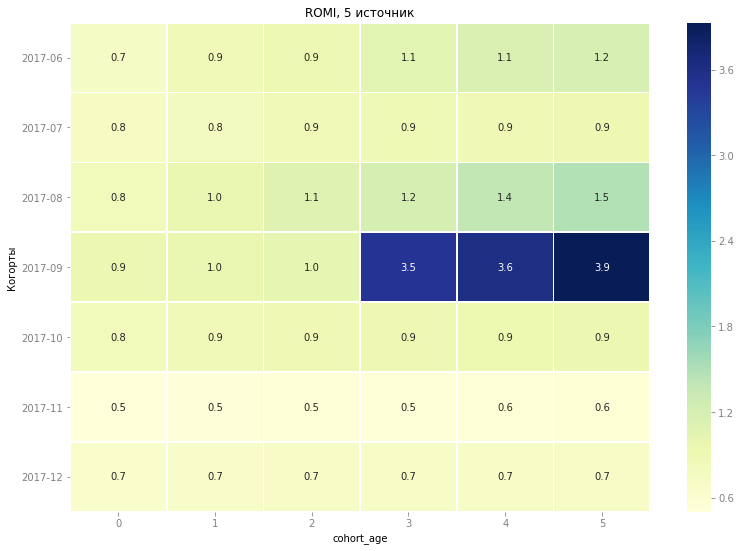

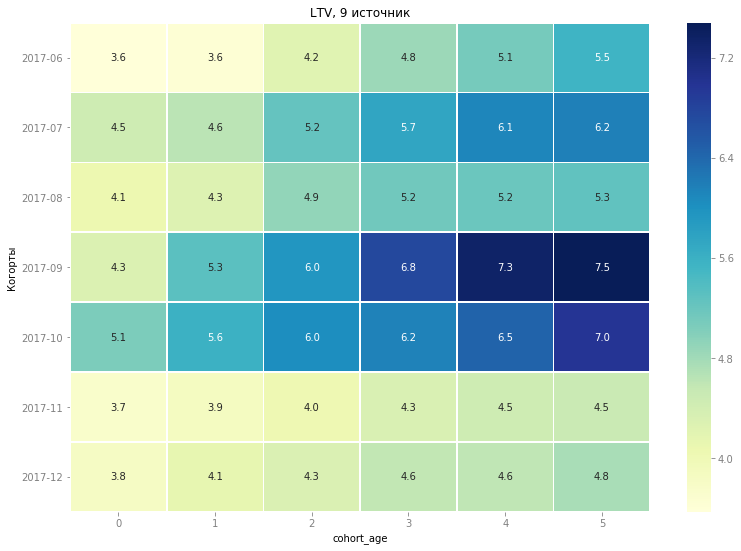

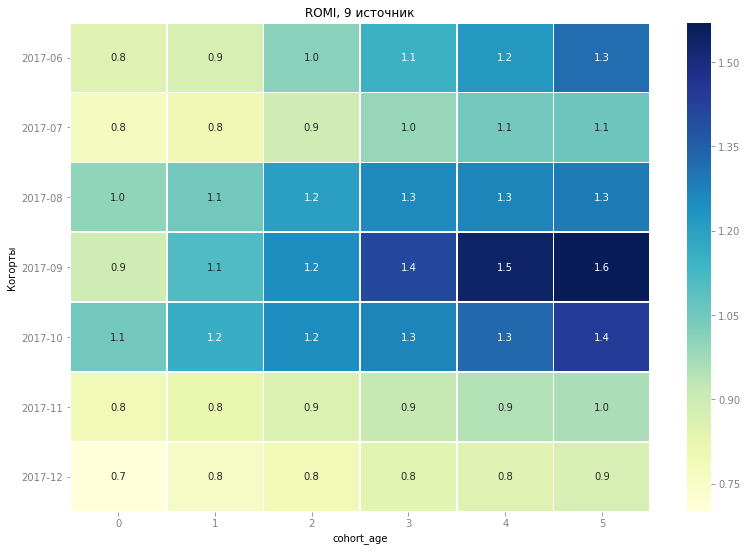

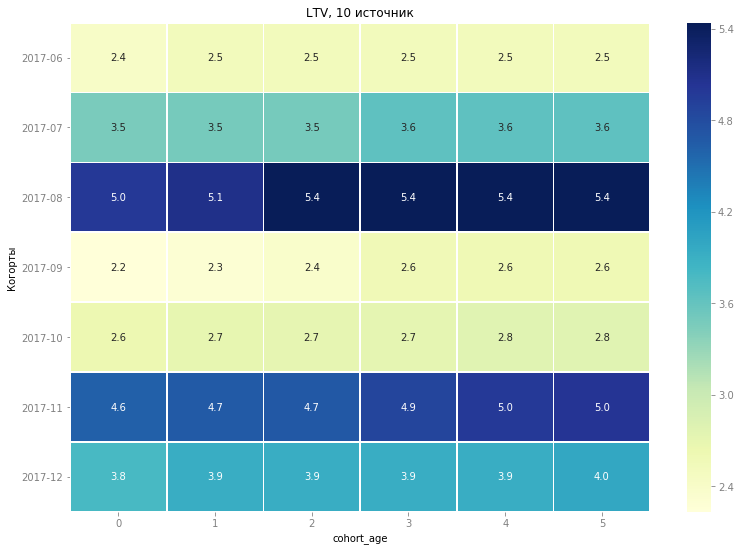

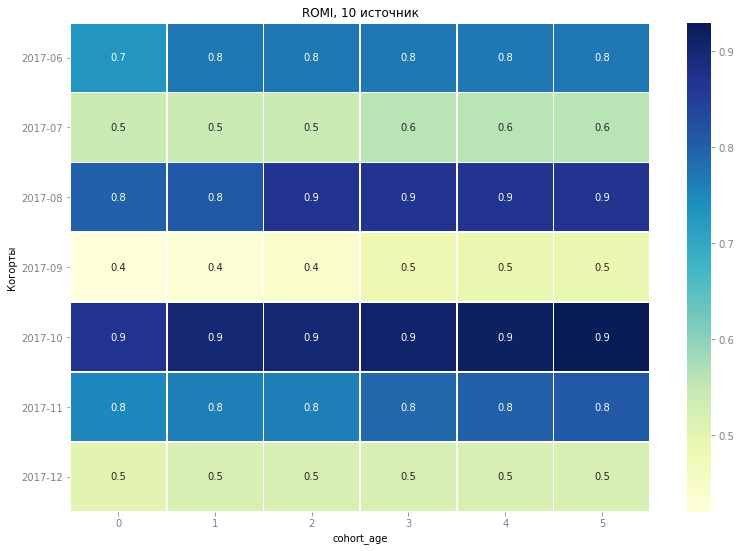

In [83]:
mean_romi_output = pd.DataFrame()
mean_ltv_output = pd.DataFrame()

for i in source_list:

    cohort_sizes_source = orders.query('first_source == @i').groupby('first_order_month')\
        .agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_source.columns = ['first_order_month', 'total_buyers']
    
    cohorts_romi = orders.query('first_source == @i').groupby(['first_order_month','order_month'])\
        .agg({'revenue':'sum','cohort_age':'max'}).reset_index()
    cohorts_romi = cohorts_romi.merge(cohort_sizes_source,on='first_order_month')

    margin_rate = 1

    cohorts_romi['gp'] = cohorts_romi['revenue'] * margin_rate
    cohorts_romi['ltv'] = cohorts_romi['gp'] / cohorts_romi['total_buyers']
    cohorts_romi['first_order_month'] =  cohorts_romi['first_order_month'].dt.strftime('%Y-%m')
  
    cohorts_romi = cohorts_romi.join(
        costs.query('source_id == @i').groupby('month').agg({'costs':'sum'}), on = 'first_order_month')
    cohorts_romi['cac'] = cohorts_romi['costs'] / cohorts_romi['total_buyers']
    cohorts_romi['romi'] = cohorts_romi['ltv'] / cohorts_romi['cac']
    
    # Cтроим графики
    output_ltv = cohorts_romi.query('cohort_age < 6 and first_order_month <= "2017-12"').pivot_table(
    index='first_order_month', columns='cohort_age', values='ltv', aggfunc='mean'
    )
    
    
    output_ltv = output_ltv.fillna(0).cumsum(axis=1).round(2)
    
    plt.figure(figsize=(13, 9))
    plt.title('LTV, {} источник'.format(i))
    sns.heatmap(
    output_ltv, annot=True, fmt='.1f', linewidths=0.7, cmap='YlGnBu')
    plt.ylabel('Когорты')
    plt.yticks(rotation=0)
    plt.show()
    
 
    output_romi = cohorts_romi.query('cohort_age < 6 and first_order_month <= "2017-12"').pivot_table(
        index='first_order_month', columns='cohort_age', values='romi', aggfunc='mean')

    output_romi = output_romi.fillna(0).cumsum(axis=1).round(2) 
    
    plt.figure(figsize=(13, 9))
    plt.title('ROMI, {} источник'.format(i))
    sns.heatmap(
    output_romi, annot=True, fmt='.1f', linewidths=0.7, cmap='YlGnBu')
    plt.ylabel('Когорты')
    plt.yticks(rotation=0)
    plt.show()
    
    # Заполняем таблицы со средними значениями LTV и ROMI
    mean_ltv = output_ltv.mean(axis =0).to_frame()
    mean_ltv.columns = ['source_{}'.format(i)]
    if mean_ltv_output.empty :
        mean_ltv_output = mean_ltv
    else:     
        mean_ltv_output = mean_ltv_output.join(mean_ltv)
        
    mean_romi = output_romi.mean(axis =0).to_frame()
    mean_romi.columns = ['source_{}'.format(i)]
    if mean_romi_output.empty :
        mean_romi_output = mean_romi
    else:     
        mean_romi_output = mean_romi_output.join(mean_romi)
    
   

Выведем полученные средние данные LTV и ROMI для кажого источника в формате тепловой карты.

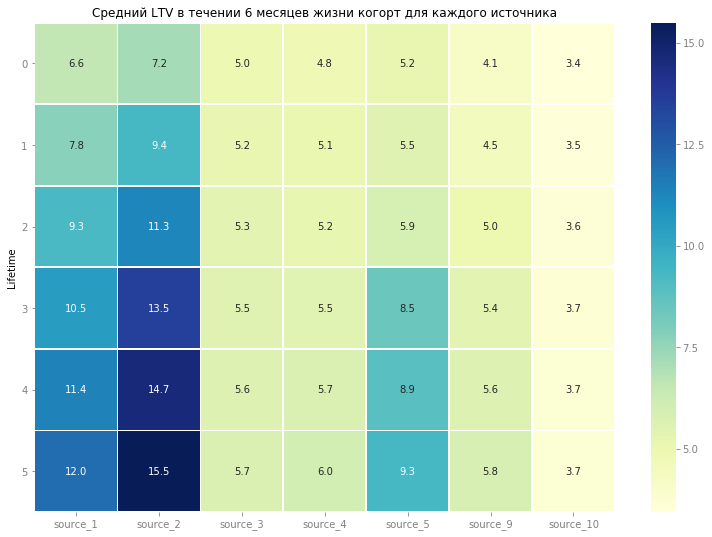

In [84]:
plt.figure(figsize=(13, 9))
plt.title('Средний LTV в течении 6 месяцев жизни когорт для каждого источника')
sns.heatmap(mean_ltv_output,  annot=True, fmt='.1f', linewidths=0.7, cmap='YlGnBu')
plt.ylabel('Lifetime')
plt.yticks(rotation=0)
plt.show()




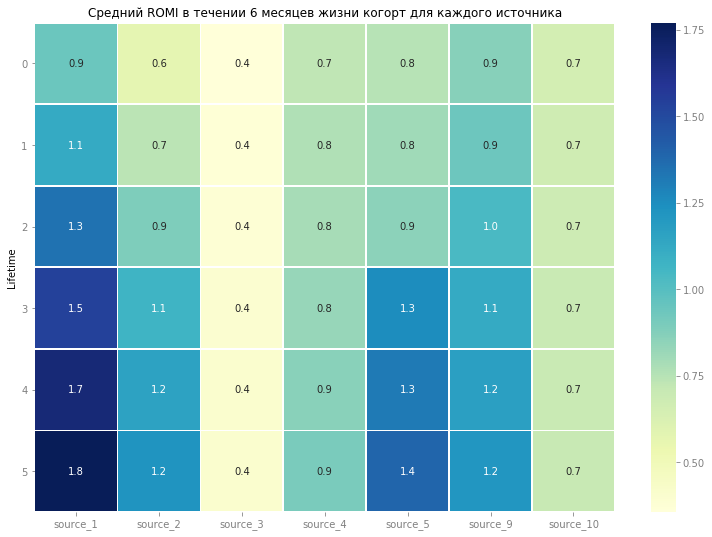

In [85]:
plt.figure(figsize=(13, 9))
plt.title('Средний ROMI в течении 6 месяцев жизни когорт для каждого источника')
sns.heatmap(mean_romi_output,  annot=True, fmt='.1f', linewidths=0.7, cmap='YlGnBu')
plt.ylabel('Lifetime')
plt.yticks(rotation=0)
plt.show()

Источники, инвестиции в которые не окупились на шестой месяц жизни когорт, оказались под третьим, четвертым и десятым номером.

Источник 1 в среднем окупается на 2 месяц.  
Источник 2 в среднем окупается на 4 месяц.  
Источник 5 в среднем окупается на 4 месяц.  
Источник 9 в среднем окупается на 3 месяц.  

Посчитаем общий ROMI для всех источников, выведем тепловую карту и определим наиболее перспективные когорты пользователей.

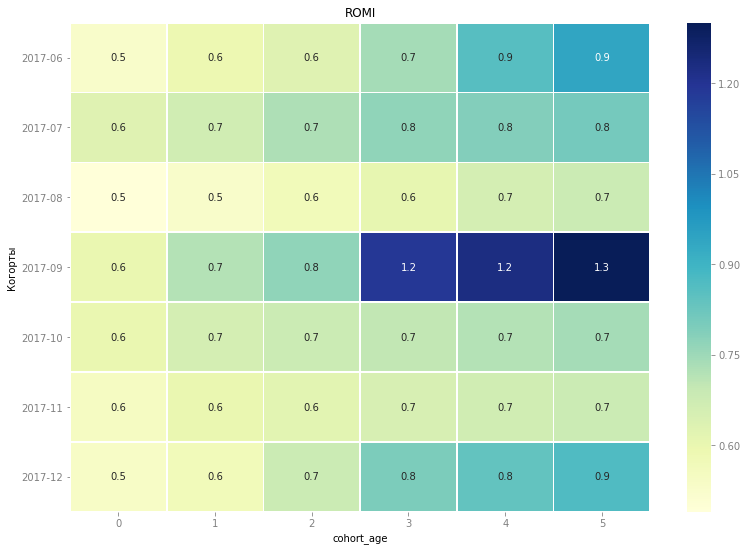

In [86]:
romi = cohorts_revenue.join(
        costs.groupby('month').agg({'costs':'sum'}), on = 'first_order_month')
romi['cac'] = romi['costs'] / romi['total_buyers']
romi['romi'] = romi['ltv'] / romi['cac']

output_romi = romi.query('cohort_age < 6 and first_order_month <= "2017-12"').pivot_table(
        index='first_order_month', columns='cohort_age', values='romi', aggfunc='mean')

output_romi = output_romi.cumsum(axis=1).round(2) 
    
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
output_romi, annot=True, fmt='.1f', linewidths=0.7, cmap='YlGnBu')
plt.ylabel('Когорты')
plt.yticks(rotation=0)
plt.show()

Наиболее перспективной можно считать коготу сентября 2017 года - за 6 месяцев только у нее получилось окупиться.

## Выводы

1. Источники трафика.

Определены наиболее окупаемые источники трафика - под номером 1, 2, 5 и 9. В среднем, по прошествии 6 месяцев все из них окупились, и клиенты, пришедшие из этих источников, начали приносить прибыль. Наиболее перспективным можно считать 1 источник - стоимость привлечения клиента у него одна из самых малых, а окупаемость в среднем происходит уже на второй месяц. Однако 9 источник требует допольнительного исследования в дальнейшем, его окупаемость падает в течении рассматриваемого периода, а в марте 2018 года расходы на этот источник увеличились в несколько раз.
    
Стоит отказаться от источников под номером 3, 4 и 10 - затраты на привлечение клиентов из этих источников в среднем не окупаются по прошествии 6 месяцев. Самым бесперспективным можно считать 3 источник, у которого самая большая стоимость привлечения клиента и на который уходит больше всего затрат.

 2. Маркетинговые метрики, продуктовые метрики и метрики электронной комерции.

В процессе изучения дневной, недельной и месячной активности пользователей были сделаны слудующие выводы:

 - Было обнаружены три периода, в течении которых активность уникальных пользователей довольно сильно менялась:
   - Период с июля по октябрь 2017 года с меньшей активностью пользователей, в среднем 555 человек в день.
   - С октября 2017 по март 2018 года, когда активность уникальных пользователей возросла, с наблюдаемыми пиками до 3000 тысяч пользователей в день.
   - С марта по июль 2018 года, когда активность пользователей упала - возможно это как-то связано с техническим сбоем, обнаруженным 31 марта, или уменьшенной активностью по привлечению новых клиентов.
 - Максимальное количество уникальных пользователей было зафиксировано во время проведения акции "Черная Птяница в социальных сетях проекта. Можно предположить, что данный канал привлечения клиентов может дать в три раза больший прирост уникальных пользователей по сравнению со средними значенями.
 
При изучении пользовательских сессий было обнаружено, что пользаватели Яндекс.Афиши редко заходят на сайт чаще одного раза в день.  Средняя продолжитльность сессии - 60 секунд. 

В процессе изучения метрик электронной комерции были сделаны следующие выводы:
   - В среднем, с момента первого визита до продажи проходит 1 минута. Клиенты Яндекс.Афиши чаще всего заходят на сайт не выбирать, а сразу покупать.
   - В среднем, за 6 месяцев один покупатель совешает 1.32 заказа. Эта метрика говорит о том, что покупатели редко совершают больше двух покупок - стоит больше ориентироваться на новых клиентов или предлагать персональные скидки клиентам, уже совершившим покупку.
   - Средний чек равен 5.00 у.е. Так же было обнаружено, что средний чек сильно зависит от сезонности. Самый большой средний чек наблюдается накануне Нового Года, а самый малый - после нового года и в июле
   - В среднем, каждый покупатель за 6 месяцев приносит 7.97 у.е. валовой прибыли. 
   
В процессе изучения маркетинговых метрик были сделаны следующие выводы:
 - Средняя стомость привлечения одного покупателя за весь исследуемый период равна 9 у.е.
 - На протяжении изучаемого периода стоимость привлечения одного клиента увеличилась в 2 раза. Стоит персмотреть расходы на маркетинг и оптимизировать расходы на источники трафика.
 - В процессе изучения метрик ROMI для разных источников трафика были определены следующие средние периоды окупаемости:
   - Источник 1 в среднем окупается на 2 месяц.
   - Источник 2 в среднем окупается на 4 месяц.
   - Источник 5 в среднем окупается на 4 месяц.
   - Источник 9 в среднем окупается на 3 месяц.

3. Итоги когортного анализа.

Итоги когортного анализа коэффициента удержания пользователя:  
 - Средний Retension Rate на второй месяц жизни когорт составил  6.5%.  
 - Со временем от когорт 2017 года к когортам 2018 средний кэффициент удержания уменьшается, как на второй месяц, так и в течении дальнейшей жизни когорт. 
 -  Лучшие резульаты показывает когорта июля 2016 года - даже спустя 12 месяцев жизни ее  Retension Rate составляет 4.5% 
 
По окупаемости инвестиций в маркетинг лучше всех показали себя когорта сентября 2017 года - за 6 месяцев только у нее получилось окупиться.